<a href="https://colab.research.google.com/github/DrashiDave/AQI-Prediction/blob/main/Homework%208/Data_690_Homework_8_AB37815_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EXERCISE 1:**

In [2]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding

In [3]:
corpus = [
    "This is good pizza",
    "I love Italian pizza",
    "The best pizza",
    "nice pizza",
    "Excellent pizza",
    "I love pizza",
    "The pizza was alright",
    "disgusting pineapple pizza",
    "not good pizza",
    "bad pizza",
    "very bad pizza",
    "I had better pizza"
]


In [12]:
# Positive [1] and Negative [0] labels

labels = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
labels = tf.convert_to_tensor(labels, dtype=tf.int32)

In [6]:
df1 = pd.DataFrame({'text': corpus, 'sentiment': labels})
df1.head()

,text,sentiment
0,This is good pizza,1
1,I love Italian pizza,1
2,The best pizza,1
3,nice pizza,1
4,Excellent pizza,1


In [13]:
VocabularySize = df1.text.str.split(expand=True).stack().nunique()
EncodedCorpus = [one_hot(sentence, VocabularySize) for sentence in corpus]
print(EncodedCorpus)

[[1, 11, 17, 7], [2, 17, 8, 7], [18, 19, 7], [17, 7], [3, 7], [2, 17, 7], [18, 7, 12, 6], [14, 11, 7], [17, 17, 7], [10, 7], [4, 10, 7], [2, 8, 18, 7]]


In [14]:
MaxLength = max(len(sentence) for sentence in EncodedCorpus)

padded_corpus = pad_sequences(EncodedCorpus, maxlen = MaxLength, padding='post')
print(padded_corpus)

[[ 1 11 17  7]
 [ 2 17  8  7]
 [18 19  7  0]
 [17  7  0  0]
 [ 3  7  0  0]
 [ 2 17  7  0]
 [18  7 12  6]
 [14 11  7  0]
 [17 17  7  0]
 [10  7  0  0]
 [ 4 10  7  0]
 [ 2  8 18  7]]


In [15]:
model = Sequential([
    Embedding(input_dim = VocabularySize, output_dim = 6, input_length = MaxLength),
    Flatten(),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [17]:
model.fit(padded_corpus, labels, epochs = 50, verbose = 1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - acc: 0.5000 - loss: 0.6902
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - acc: 0.5000 - loss: 0.6894
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - acc: 0.5000 - loss: 0.6885
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - acc: 0.5000 - loss: 0.6877
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - acc: 0.5000 - loss: 0.6868
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - acc: 0.5000 - loss: 0.6860
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - acc: 0.5000 - loss: 0.6852
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - acc: 0.5833 - loss: 0.6843
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - acc: 0.7500 - loss: 0.6835
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - acc: 0.7500 - loss: 0.6827
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - acc: 0.7500 - loss: 0.6818
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - acc: 0.7500 - loss: 0.6810
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - acc: 0.7500

My Conclusions about the Model:

- We have a well structured model withdembedding, flatten, and dense layers.
- We have a small dataset (12 samples) and it resulted to high accuracy (83%).
- The high accuracy is the result of overfitting in our model.


<br>

#**EXERCISE 2:**

In [19]:
import nltk
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
file_path = '/content/drive/My Drive/Colab Notebooks/DATA - 690 NLP/Tweets.csv'
df_tweets = pd.read_csv(file_path)

In [38]:
df_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


In [39]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

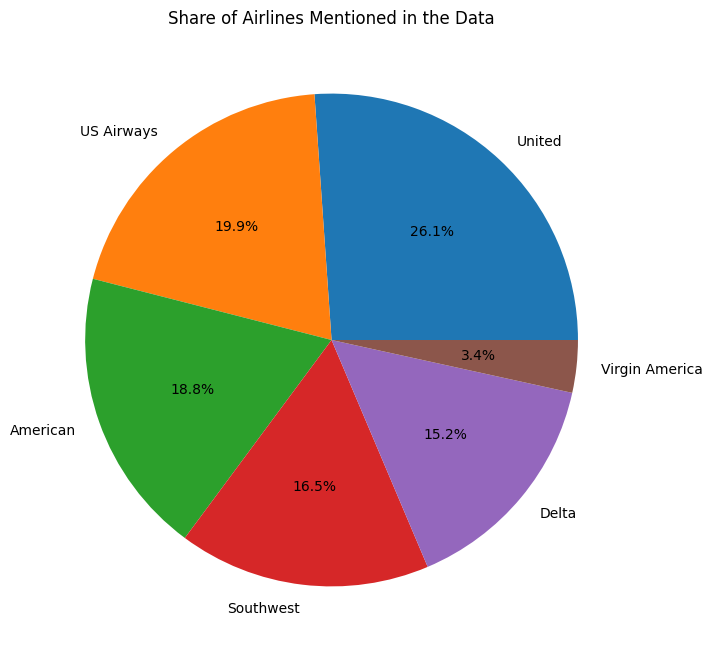

In [40]:
df_tweets['airline'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Share of Airlines Mentioned in the Data')
plt.ylabel('')  # Hide the y-label for a cleaner plot
plt.show()

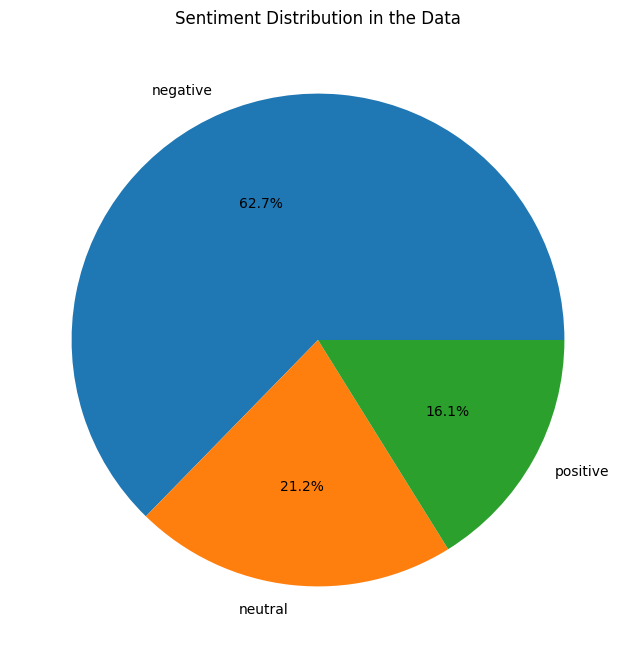

In [41]:
df_tweets['airline_sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Sentiment Distribution in the Data')
plt.ylabel('')  # Hide the y-label for a cleaner plot
plt.show()

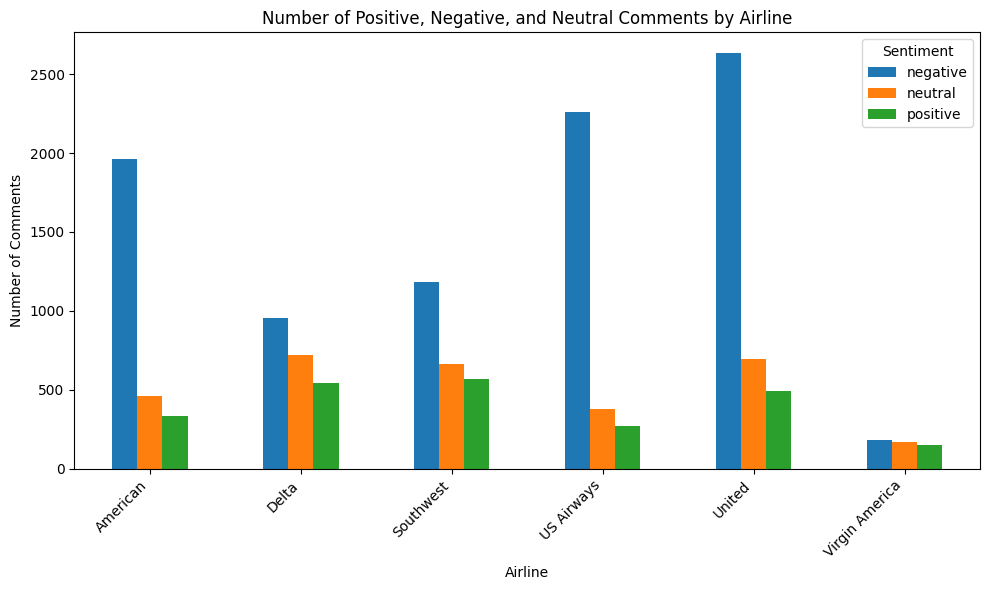

In [42]:
airline_sentiment_counts = df_tweets.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=0)

# Plotting the bar chart
airline_sentiment_counts.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Number of Positive, Negative, and Neutral Comments by Airline')
plt.ylabel('Number of Comments')
plt.xlabel('Airline')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Sentiment')
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

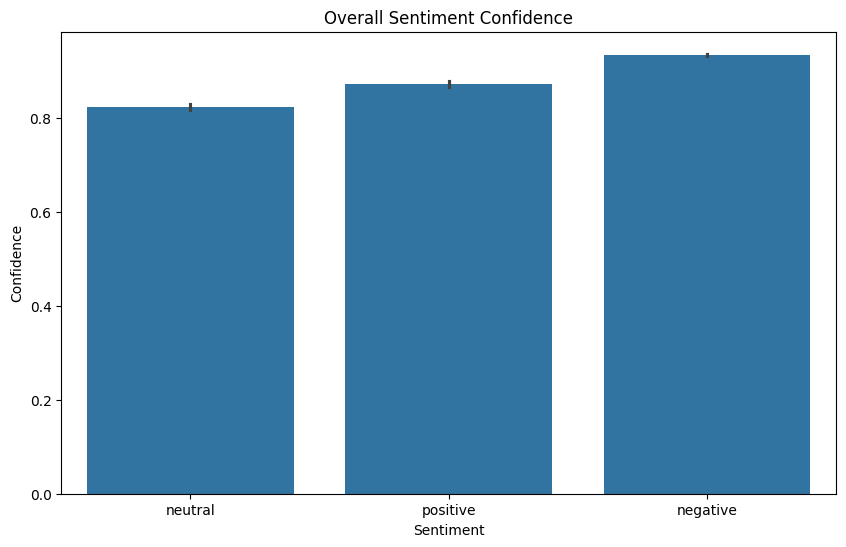

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence', data = df_tweets)
plt.title('Overall Sentiment Confidence')
plt.xlabel('Sentiment')
plt.ylabel('Confidence')
plt.show()

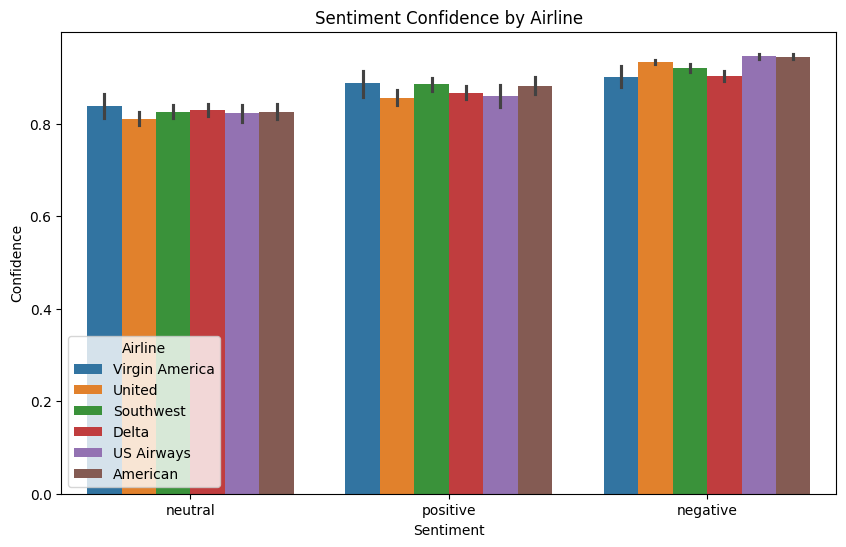

In [93]:
plt.figure(figsize=(10, 6))
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence', hue='airline', data=df_tweets)
plt.title('Sentiment Confidence by Airline')
plt.xlabel('Sentiment')
plt.ylabel('Confidence')
plt.legend(title='Airline')
plt.show()

In [62]:
X = df_tweets['text'] # features
y = df_tweets['airline_sentiment'] #labels

In [46]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
y_encode = label_encode.fit_transform(y)
print(y_encode[:10])

[1 2 1 0 0 0 2 1 2 2]


In [49]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [64]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
punctuate = string.punctuation

def clean_tweet_text(text):

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = ''.join(word for word in text if word not in punctuate)

    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)

    return text

In [65]:
cleaned_features = X.apply(clean_tweet_text)

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(cleaned_features)

In [68]:
print(X_vectorized.shape)

(14640, 5000)


In [69]:
from sklearn.model_selection import train_test_split

y = df_tweets['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11712, 5000)
X_test shape: (2928, 5000)
y_train shape: (11712,)
y_test shape: (2928,)


In [70]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [71]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [72]:
train_prediction = rf_classifier.predict(X_train)
test_prediction = rf_classifier.predict(X_test)

In [73]:
print("First few predictions:", test_prediction[:10] )

First few predictions: ['positive' 'negative' 'negative' 'neutral' 'neutral' 'negative'
 'negative' 'positive' 'negative' 'positive']


TRAINING REPORT: 

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00      7289
     neutral       0.98      0.99      0.99      2519
    positive       0.99      0.99      0.99      1904

    accuracy                           0.99     11712
   macro avg       0.99      0.99      0.99     11712
weighted avg       0.99      0.99      0.99     11712

ACCURACY: 0.9941

CONFUSION MATRIX: 



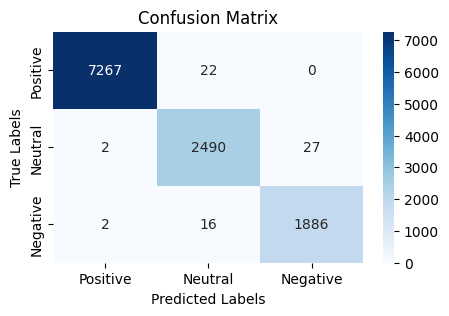

In [89]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("TRAINING REPORT: \n")

# Classification Report
class_report = classification_report(y_train, train_prediction)
print("CLASSIFICATION REPORT:\n", class_report)

# Accuracy Score
accuracy = accuracy_score(y_train, train_prediction)
print(f"ACCURACY: {accuracy:.4f}\n")

# Confusion Matrix
print("CONFUSION MATRIX: \n")
cm = confusion_matrix(y_train, train_prediction)

# Plotting the Confusion Matrix using a heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'], yticklabels=['Positive', 'Neutral', 'Negative'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

TESTING REPORT: 

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

    negative       0.83      0.89      0.86      1889
     neutral       0.57      0.49      0.53       580
    positive       0.73      0.63      0.68       459

    accuracy                           0.77      2928
   macro avg       0.71      0.67      0.69      2928
weighted avg       0.76      0.77      0.76      2928

ACCURACY: 0.7698

CONFUSION MATRIX: 



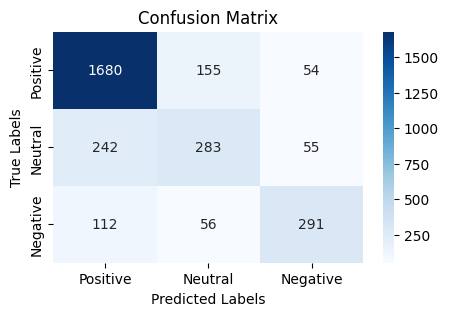

In [90]:
print("TESTING REPORT: \n")

# Classification Report
class_report = classification_report(y_test, test_prediction)
print("CLASSIFICATION REPORT:\n", class_report)

# Accuracy Score
accuracy = accuracy_score(y_test, test_prediction)
print(f"ACCURACY: {accuracy:.4f}\n")

# Confusion Matrix
print("CONFUSION MATRIX: \n")
cm = confusion_matrix(y_test, test_prediction)

# Plotting the Confusion Matrix using a heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'], yticklabels=['Positive', 'Neutral', 'Negative'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


MY CONCLUSIONS:
- The training score is more than the testing score.
- This significantly means Overfitting where the model has learned the training data very well but not as well on the test data.
- The model performs better at identifying negative reviews because the dataset has more negative sentiments, leading to a bias towards them.
- The model is not as effective for neutral and positive reviews, so it may not be the best choice for tasks that need balanced sentiment analysis.